In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [82]:
df = pd.read_csv('/content/creditcard.csv')

In [83]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null values in the data set

Descreptive statistics

In [86]:
'''
The resulting DataFrame is then transposed using the .T attribute so that the summary statistics for each column 
are displayed in rows rather than columns, making it easier to read. 
'''
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [87]:
df.shape

(284807, 31)

There are 284807 rows and 31 columns

In [88]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

FRAUD CASES AND GENUINE CASES

In [89]:
'''
filters the rows of the dataset df to include only those where the value of 
the Class column is equal to 1, which is typically used to indicate a fraudulent transaction.
'''
fraud_cases=len(df[df['Class']==1])

In [90]:
print("Number of Fraud Cases:",fraud_cases)

Number of Fraud Cases: 492


In [91]:
NonFraud_cases=len(df[df['Class']==0])

In [92]:
print("Numbers of Non Fraud Cases:",NonFraud_cases)

Numbers of Non Fraud Cases: 284315


In [93]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [94]:
# calculates some summary statistics for the 'Amount' column of the fraud DataFrame
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [95]:
# calculates some summary statistics for the 'Amount' column of the genuine DataFrame
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

EDA(Exploratory Data Analysis)


<function matplotlib.pyplot.show(close=None, block=None)>

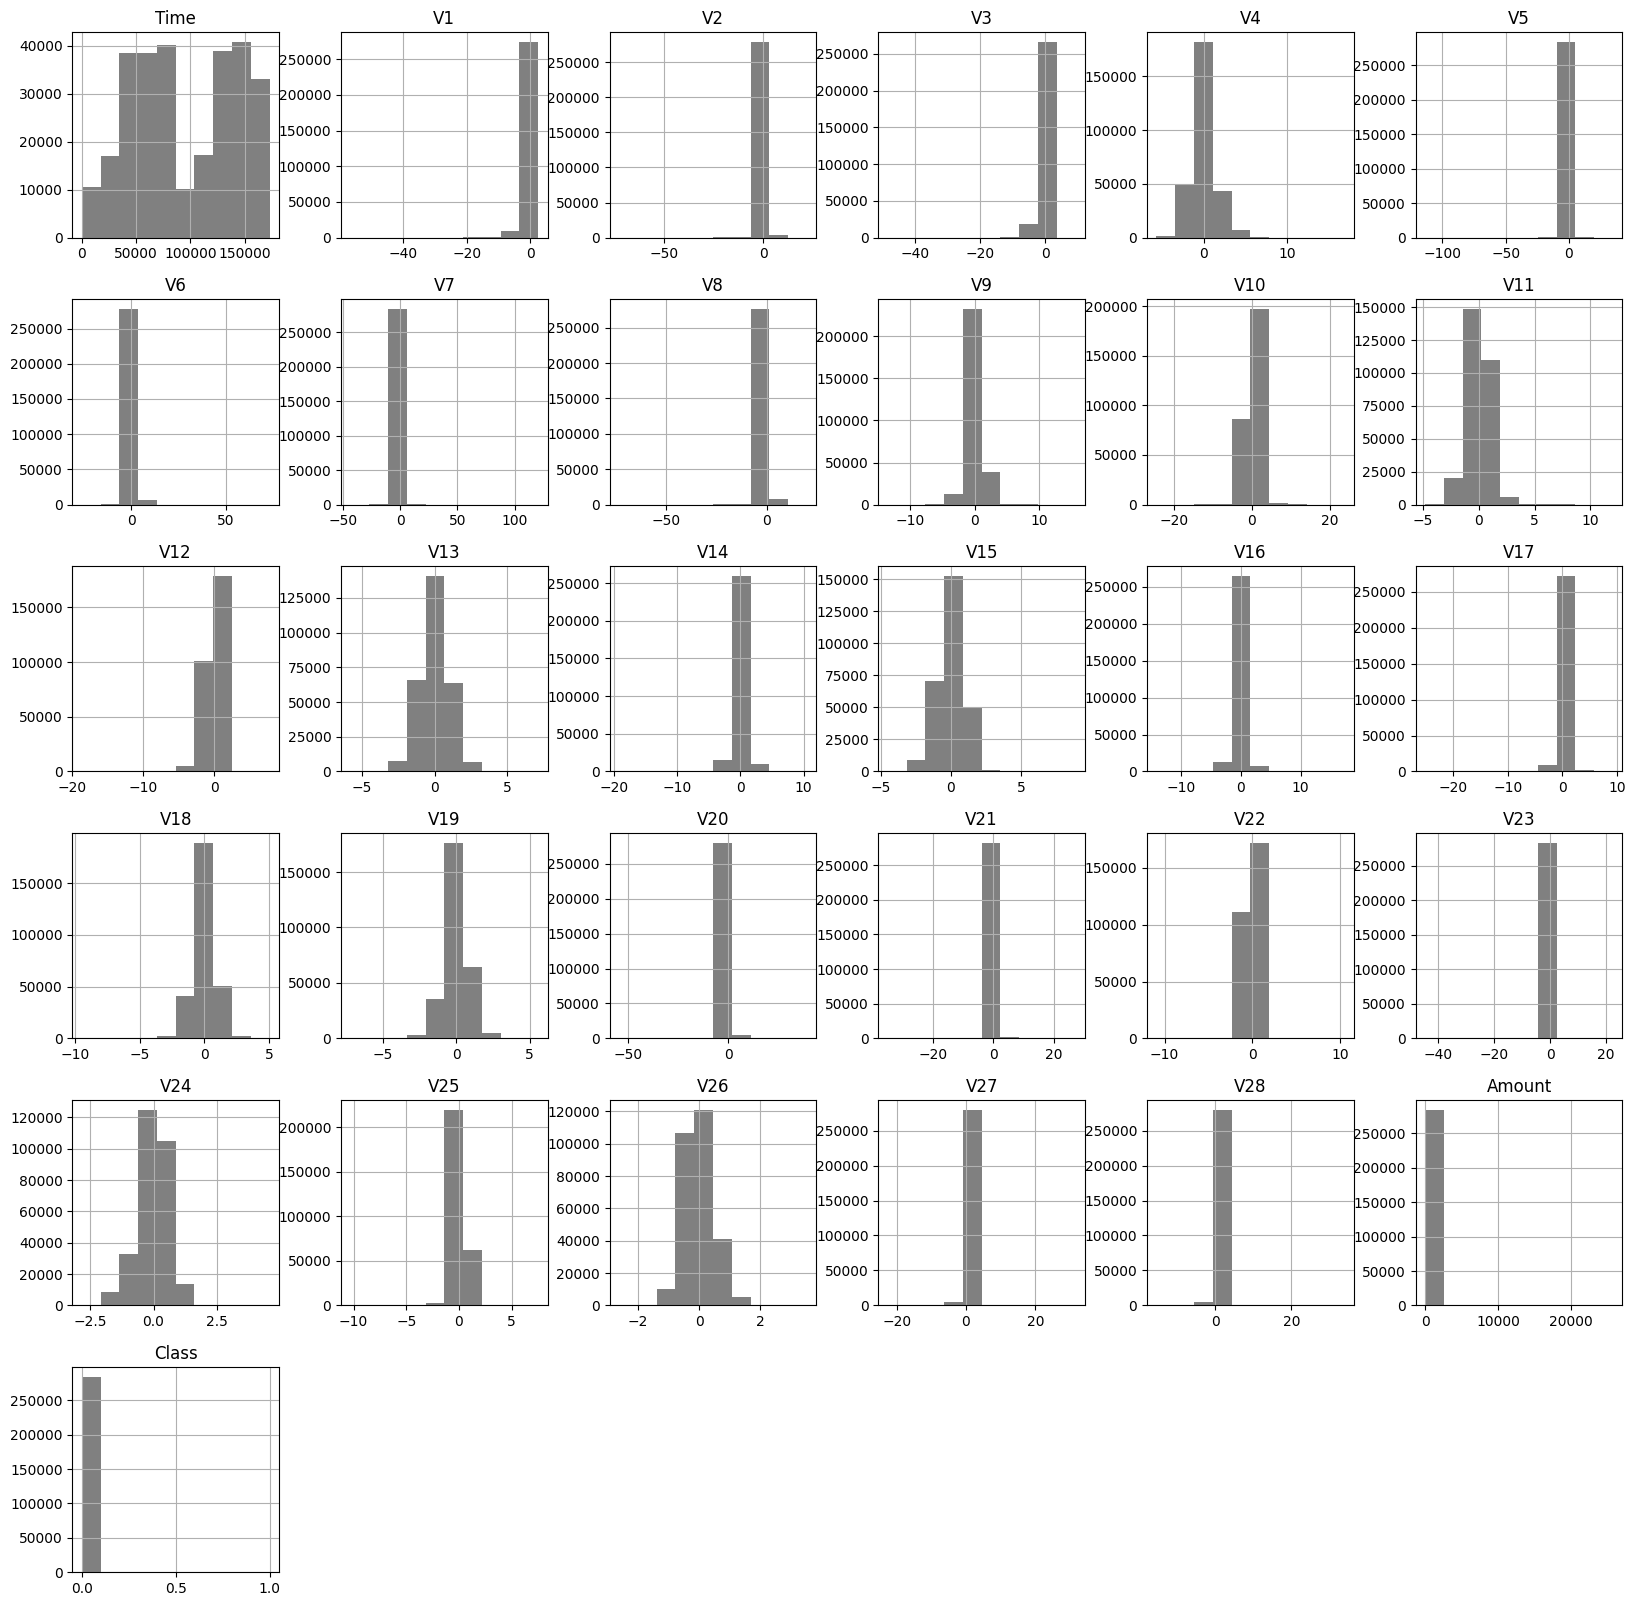

In [96]:
df.hist(figsize=(20,20),color= "grey")
plt.show

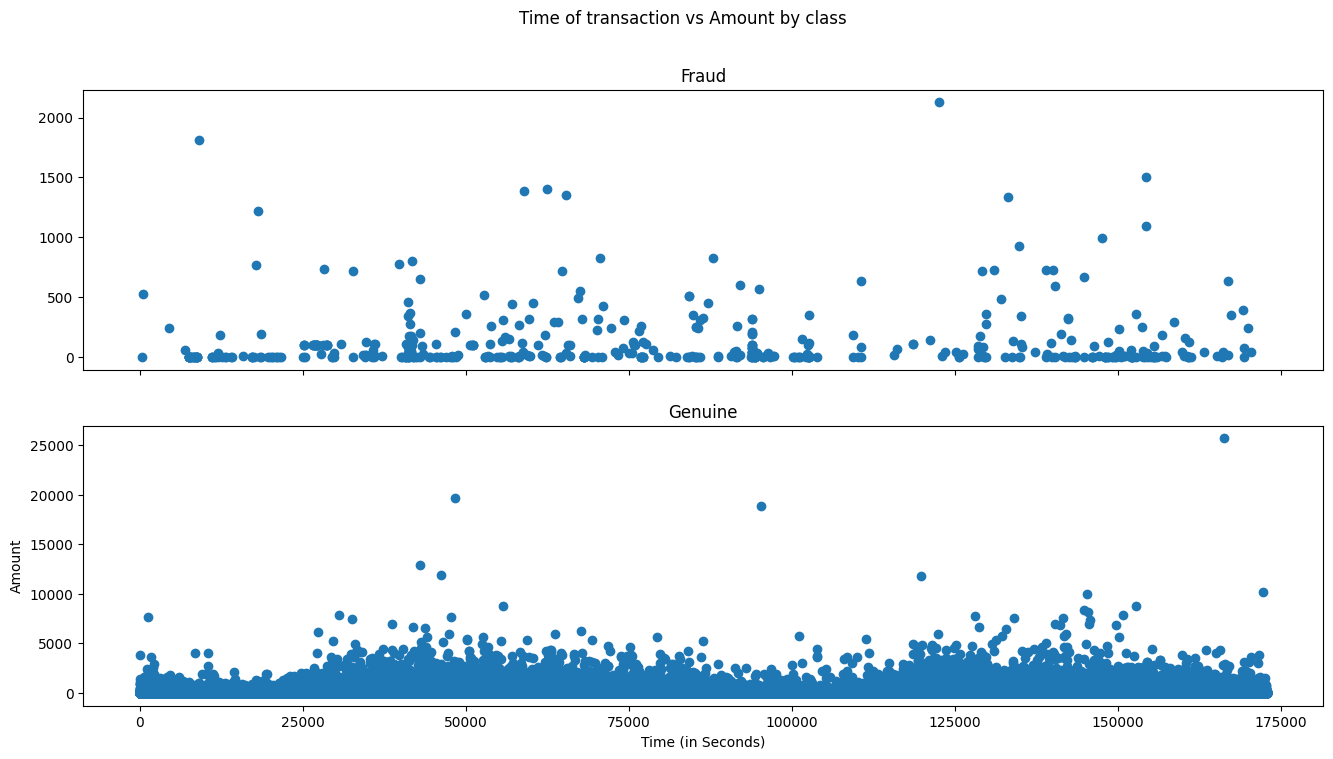

In [97]:
# set the size of the figure to be displayed
rcParams['figure.figsize'] = 16, 8

# create a figure with two subplots (axes) that share the x-axis
fig, axs = plt.subplots(2, 1, sharex=True)

# set the title of the figure
fig.suptitle('Time of transaction vs Amount by class')

# iterate over two classes of data (fraud and genuine) and plot them on each subplot
for i, data in enumerate([fraud, genuine]):
    axs[i].scatter(data.Time, data.Amount) # plot the data points
    axs[i].set_title('Fraud' if i == 0 else 'Genuine') # set the title of each subplot based on the class of data
    
# set the label of the x-axis
plt.xlabel('Time (in Seconds)')

# set the label of the y-axis
plt.ylabel('Amount')

# show the plot
plt.show()


CORRELATION

<Axes: >

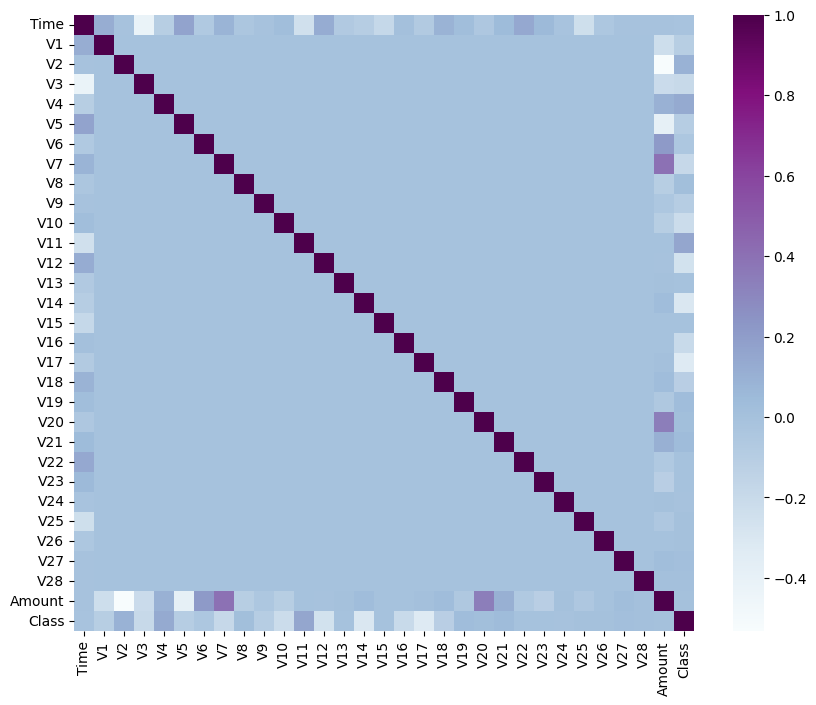

In [98]:
# Setting the figure size
plt.figure(figsize=(10,8))

# Calculating the correlation matrix
corr = df.corr()

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(corr, cmap="BuPu")


In [99]:
X=df.drop(['Class'],axis=1)

In [100]:
y=df['Class']

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [102]:
lr=LogisticRegression(max_iter=1000)

In [103]:
model=lr.fit(X_train,y_train)

In [104]:
predectionModel=model.predict(X_test)

In [105]:
accuracy_score(y_test,predectionModel)

0.9990519995786665

Overall the model performed with a very high accuracy.